# In this case study lets explain the Support Vector regression and its types using boston dataset

# About Dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollors
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000 dollor's

## Import Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sks
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


Lets load the data

In [2]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
result_dataset = pd.DataFrame(data =np.zeros((6,6)) , index = ['r2_score','adjusted_r2_score','median_absolute_error','mean_squared_error','mean_absolute_percentage_error','mean_absolute_error'],columns = ['linear_SVR','linear_kernel_SVR','ploy_kernel_SVR','rbf_kernel_SVR','sigmoid_kernel_SVR','Nu_SVM'])
result_dataset

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.0,0.0,0.0,0.0,0.0,0.0
adjusted_r2_score,0.0,0.0,0.0,0.0,0.0,0.0
median_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_squared_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_percentage_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
result_dataset

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.0,0.0,0.0,0.0,0.0,0.0
adjusted_r2_score,0.0,0.0,0.0,0.0,0.0,0.0
median_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_squared_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_percentage_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def metrics(y_true,y_pred,model = 'linear_regression'):
  r2_scores = r2_score(y_true,y_pred)
  p = 13 # number of features in the test dataset
  adjusted_r2_scores = 1- (1- r2_score(y_true,y_pred))*(len(y_true)-1)/(len(y_true)-p-1)
  median_absolute_errors = median_absolute_error(y_true,y_pred)
  mean_squared_errors = mean_squared_error(y_true,y_pred)
  mean_absolute_percentage_errors = mean_absolute_percentage_error(y_true,y_pred)
  mean_absolute_errors = mean_absolute_error(y_true,y_pred)
  result_dataset[model]['r2_score'] = r2_scores
  result_dataset[model]['adjusted_r2_score'] = adjusted_r2_scores
  result_dataset[model]['median_absolute_error'] = median_absolute_errors
  result_dataset[model]['mean_squared_error'] = mean_squared_errors
  result_dataset[model]['mean_absolute_percentage_error'] = mean_absolute_percentage_errors
  result_dataset[model]['mean_absolute_error'] = mean_absolute_errors
  print('r2_score for '+ model + " :" + str(r2_scores))
  print('adjusted_r2_score for '+ model + " :" + str(adjusted_r2_scores)) # Adj r2 = 1-(1-R2)*(n-1)/(n-p-1) Where n is the sample size and p is the number of independent variables.
  print('median_absolute_error for '+ model + " :" + str(median_absolute_errors))
  print('mean_squared_error for '+ model + " :" + str(mean_squared_errors))
  print('mean_absolute_percentage_error for '+ model + " :" + str(mean_absolute_percentage_errors))
  print('mean_absolute_error for '+ model + " :" + str(mean_absolute_errors))



In [13]:
def plot(y_true,y_pred):
  plt.figure(figsize=(5, 5))
  plt.scatter(y_true, y_pred)
  plt.xlabel("Prices: $Y_i$")
  plt.ylabel("Predicted prices: $\hat{Y}_i$")
  plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
  print("\n************* y_true vs y_pred ********************\n")
  plt.show()
  delta_y = y_test - y_pred;
  sns.set_style('whitegrid')
  sns.kdeplot(np.array(delta_y), bw=0.5)
  print("\n************** error distribution *******************\n")
  plt.show()
  sns.set_style('whitegrid')
  sns.kdeplot(np.array(y_pred), bw=0.5)
  print("\n************** y_pred distribution *******************\n")
  plt.show()


# lets implement linear svr

In [14]:
parameters =  {'C': np.random.uniform(low=0.0, high=3.0, size=10),'epsilon': np.random.uniform(low=0.0, high=3.0, size=10), 'loss' : ['epsilon_insensitive', 'squared_epsilon_insensitive']}
svr_gridsearch = GridSearchCV(LinearSVR(),parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 5, return_train_score = True)
svr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': array([1.8965965 , 1.0800046 , 0.44242298, 0.48086481, 2.11654708,
       0.1978254 , 2.59112709, 2.88019802, 2.97570103, 0.3389962 ]),
                         'epsilon': array([1.20252076, 2.99364992, 0.79238697, 1.56728671, 0.04502256,
       0.3105442 , 0.17679009, 1.14835304, 2.5571914 , 2.55265184]),
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

**************************************************
                    best estimator                    
**************************************************
LinearSVR(C=0.3389962036354769, epsilon=1.5672867106947175)
**************************************************
**************************************************
                    test metrics                    
**************************************************
r2_score for linear_SVR :0.5958501810013161
adjusted_r2_score for linear_SVR :0.5361462304674196
median_absolute_error for linear_SVR :1.6027072750493838
mean_squared_error for linear_SVR :29.63783519073325
mean_absolute_percentage_error for linear_SVR :0.15827631546439858
mean_absolute_error for linear_SVR :3.0894701532339033
**************************************************
                    test metrics plot                    
**************************************************

************* y_true vs y_pred ********************



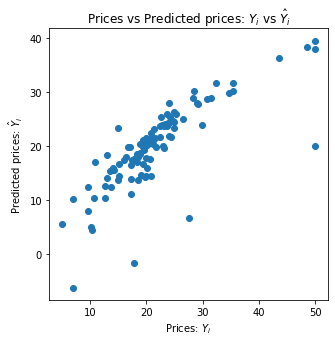


************** error distribution *******************



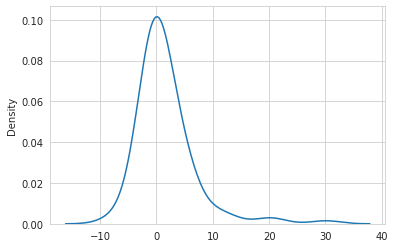


************** y_pred distribution *******************



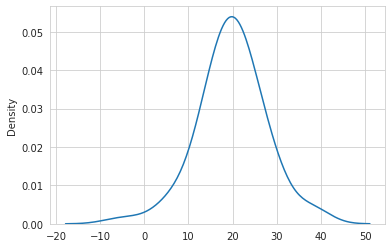

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.595850,0.0,0.0,0.0,0.0,0.0
adjusted_r2_score,0.536146,0.0,0.0,0.0,0.0,0.0
median_absolute_error,1.602707,0.0,0.0,0.0,0.0,0.0
mean_squared_error,29.637835,0.0,0.0,0.0,0.0,0.0
mean_absolute_percentage_error,0.158276,0.0,0.0,0.0,0.0,0.0
mean_absolute_error,3.089470,0.0,0.0,0.0,0.0,0.0


In [15]:
print('*'*50)
print(' '*20 + 'best estimator' + ' '*20)
print('*'*50)
print(svr_gridsearch.best_estimator_)
print('*'*50)
y_pred_svr = svr_gridsearch.predict(X_test)
print('*'*50)
print(' '*20 + 'test metrics' + ' '*20)
print('*'*50)
metrics(y_test,y_pred_svr,model = 'linear_SVR')
print('*'*50)
print(' '*20 + 'test metrics plot' + ' '*20)
print('*'*50)
plot(y_test,y_pred_svr)
result_dataset

# lets implement linear kernel svr

In [16]:
parameters =  {'C': np.random.uniform(low=0.0, high=3.0, size=10),'epsilon': np.random.uniform(low=0.0, high=3.0, size=10), 'degree': range(1, 11)}
svr_gridsearch = GridSearchCV(SVR(kernel = 'linear'),parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 5, return_train_score = True)
svr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': array([1.15997972, 0.69605259, 1.13357519, 0.49417937, 2.41105392,
       1.26967026, 0.69976209, 2.45410219, 0.21831462, 1.98139533]),
                         'degree': range(1, 11),
                         'epsilon': array([1.55802511, 1.27434036, 2.25068642, 1.33985771, 1.86477304,
       2.58168814, 2.60593515, 0.05115365, 1.31075609, 0.95894155])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

**************************************************
                    best estimator                    
**************************************************
SVR(C=0.21831461878812297, degree=1, epsilon=1.5580251133978569,
    kernel='linear')
**************************************************
**************************************************
                    test metrics                    
**************************************************
r2_score for linear_kernel_SVR :0.6261418558548768
adjusted_r2_score for linear_kernel_SVR :0.5709128118334381
median_absolute_error for linear_kernel_SVR :1.8457037962983733
mean_squared_error for linear_kernel_SVR :27.416432075459223
mean_absolute_percentage_error for linear_kernel_SVR :0.1596339252612193
mean_absolute_error for linear_kernel_SVR :3.0619482943332073
**************************************************
                    test metrics plot                    
**************************************************

************* y_tru

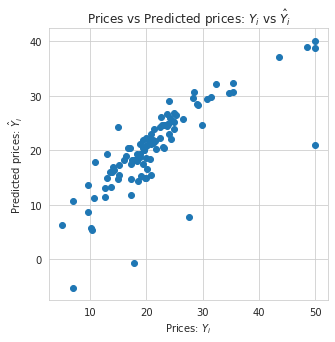


************** error distribution *******************



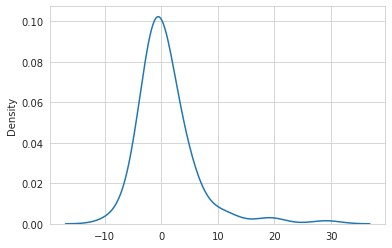


************** y_pred distribution *******************



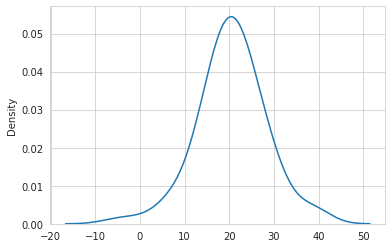

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.595850,0.626142,0.0,0.0,0.0,0.0
adjusted_r2_score,0.536146,0.570913,0.0,0.0,0.0,0.0
median_absolute_error,1.602707,1.845704,0.0,0.0,0.0,0.0
mean_squared_error,29.637835,27.416432,0.0,0.0,0.0,0.0
mean_absolute_percentage_error,0.158276,0.159634,0.0,0.0,0.0,0.0
mean_absolute_error,3.089470,3.061948,0.0,0.0,0.0,0.0


In [17]:
print('*'*50)
print(' '*20 + 'best estimator' + ' '*20)
print('*'*50)
print(svr_gridsearch.best_estimator_)
print('*'*50)
y_pred_svr = svr_gridsearch.predict(X_test)
print('*'*50)
print(' '*20 + 'test metrics' + ' '*20)
print('*'*50)
metrics(y_test,y_pred_svr,model = 'linear_kernel_SVR')
print('*'*50)
print(' '*20 + 'test metrics plot' + ' '*20)
print('*'*50)
plot(y_test,y_pred_svr)
result_dataset

# lets implement poly kernel svr

In [18]:
parameters =  {'C': np.random.uniform(low=0.0, high=3.0, size=10),'epsilon': np.random.uniform(low=0.0, high=3.0, size=10), 'degree': range(1, 11)}
svr_gridsearch = GridSearchCV(SVR(kernel = 'poly'),parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 5, return_train_score = True)
svr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': array([1.14431051, 2.77663621, 0.36828889, 0.2644396 , 0.80447416,
       1.16972996, 0.61156552, 0.41935597, 1.69919559, 0.07511908]),
                         'degree': range(1, 11),
                         'epsilon': array([2.14424888, 2.07138673, 0.29864571, 0.2911661 , 2.21762985,
       1.38943829, 0.24535379, 2.07691943, 0.20157457, 2.00005424])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

**************************************************
                    best estimator                    
**************************************************
SVR(C=0.6115655153762567, degree=1, epsilon=0.20157456679666674, kernel='poly')
**************************************************
**************************************************
                    test metrics                    
**************************************************
r2_score for ploy_kernel_SVR :0.61738104509426
adjusted_r2_score for ploy_kernel_SVR :0.5608577903922756
median_absolute_error for ploy_kernel_SVR :1.8617316162241835
mean_squared_error for ploy_kernel_SVR :28.05889547208693
mean_absolute_percentage_error for ploy_kernel_SVR :0.1549538712183027
mean_absolute_error for ploy_kernel_SVR :3.0892560499560546
**************************************************
                    test metrics plot                    
**************************************************

************* y_true vs y_pred *********

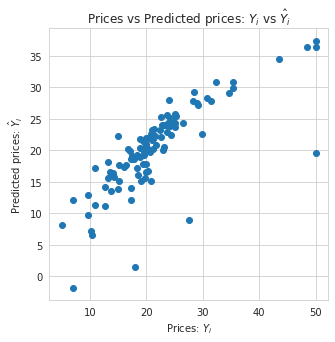


************** error distribution *******************



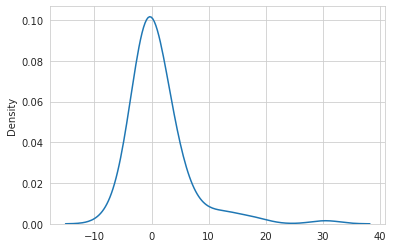


************** y_pred distribution *******************



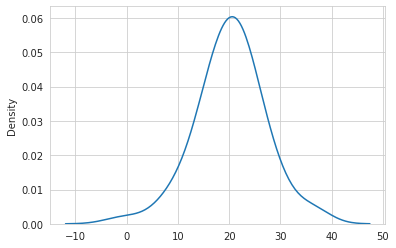

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.595850,0.626142,0.617381,0.0,0.0,0.0
adjusted_r2_score,0.536146,0.570913,0.560858,0.0,0.0,0.0
median_absolute_error,1.602707,1.845704,1.861732,0.0,0.0,0.0
mean_squared_error,29.637835,27.416432,28.058895,0.0,0.0,0.0
mean_absolute_percentage_error,0.158276,0.159634,0.154954,0.0,0.0,0.0
mean_absolute_error,3.089470,3.061948,3.089256,0.0,0.0,0.0


In [19]:
print('*'*50)
print(' '*20 + 'best estimator' + ' '*20)
print('*'*50)
print(svr_gridsearch.best_estimator_)
print('*'*50)
y_pred_svr = svr_gridsearch.predict(X_test)
print('*'*50)
print(' '*20 + 'test metrics' + ' '*20)
print('*'*50)
metrics(y_test,y_pred_svr,model = 'ploy_kernel_SVR')
print('*'*50)
print(' '*20 + 'test metrics plot' + ' '*20)
print('*'*50)
plot(y_test,y_pred_svr)
result_dataset

# lets implement rbf kernel svr

In [20]:
parameters =  {'C': np.random.uniform(low=0.0, high=3.0, size=10),'epsilon': np.random.uniform(low=0.0, high=3.0, size=10), 'degree': range(1, 11)}
svr_gridsearch = GridSearchCV(SVR(kernel = 'rbf'),parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 5, return_train_score = True)
svr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([0.7209539 , 1.24625412, 0.42159429, 1.44936584, 1.9790702 ,
       1.51778011, 2.21319523, 2.14821102, 1.91716393, 0.21139534]),
                         'degree': range(1, 11),
                         'epsilon': array([0.28753948, 0.69940905, 0.45797923, 0.21681633, 0.07890485,
       1.39923234, 0.14738903, 1.15604347, 0.04175331, 1.19120052])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

**************************************************
                    best estimator                    
**************************************************
SVR(C=2.213195233283863, degree=1, epsilon=0.6994090510954704)
**************************************************
**************************************************
                    test metrics                    
**************************************************
r2_score for rbf_kernel_SVR :0.732353590878942
adjusted_r2_score for rbf_kernel_SVR :0.6928149168042403
median_absolute_error for rbf_kernel_SVR :1.4476514853660118
mean_squared_error for rbf_kernel_SVR :19.62752373012275
mean_absolute_percentage_error for rbf_kernel_SVR :0.1286522156773868
mean_absolute_error for rbf_kernel_SVR :2.4471346324435
**************************************************
                    test metrics plot                    
**************************************************

************* y_true vs y_pred ********************



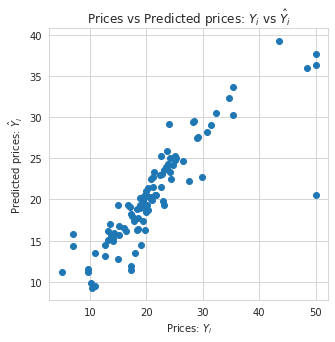


************** error distribution *******************



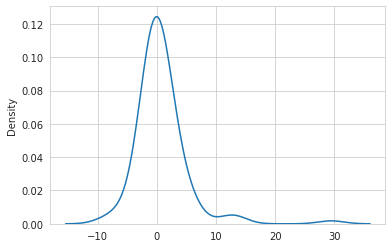


************** y_pred distribution *******************



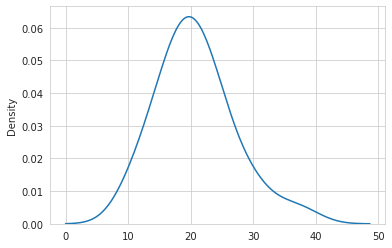

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.595850,0.626142,0.617381,0.732354,0.0,0.0
adjusted_r2_score,0.536146,0.570913,0.560858,0.692815,0.0,0.0
median_absolute_error,1.602707,1.845704,1.861732,1.447651,0.0,0.0
mean_squared_error,29.637835,27.416432,28.058895,19.627524,0.0,0.0
mean_absolute_percentage_error,0.158276,0.159634,0.154954,0.128652,0.0,0.0
mean_absolute_error,3.089470,3.061948,3.089256,2.447135,0.0,0.0


In [21]:
print('*'*50)
print(' '*20 + 'best estimator' + ' '*20)
print('*'*50)
print(svr_gridsearch.best_estimator_)
print('*'*50)
y_pred_svr = svr_gridsearch.predict(X_test)
print('*'*50)
print(' '*20 + 'test metrics' + ' '*20)
print('*'*50)
metrics(y_test,y_pred_svr,model = 'rbf_kernel_SVR')
print('*'*50)
print(' '*20 + 'test metrics plot' + ' '*20)
print('*'*50)
plot(y_test,y_pred_svr)
result_dataset

# lets implement sigmoid kernel svr

In [22]:
parameters =  {'C': np.random.uniform(low=0.0, high=3.0, size=10),'epsilon': np.random.uniform(low=0.0, high=3.0, size=10), 'degree': range(1, 11)}
svr_gridsearch = GridSearchCV(SVR(kernel = 'sigmoid'),parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 5, return_train_score = True)
svr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='sigmoid'),
             param_grid={'C': array([0.67039321, 2.82157583, 1.04991677, 1.8522733 , 2.29953977,
       2.04338124, 0.15016965, 0.44494559, 2.47863931, 2.57272239]),
                         'degree': range(1, 11),
                         'epsilon': array([0.09612129, 0.98045361, 2.4964677 , 2.94377486, 1.48073795,
       1.54740295, 1.68411635, 2.49491802, 1.07791217, 0.95684636])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

**************************************************
                    best estimator                    
**************************************************
SVR(C=0.6703932140752114, degree=1, epsilon=0.09612128764439298,
    kernel='sigmoid')
**************************************************
**************************************************
                    test metrics                    
**************************************************
r2_score for sigmoid_kernel_SVR :0.5585659558827911
adjusted_r2_score for sigmoid_kernel_SVR :0.4933541084563853
median_absolute_error for sigmoid_kernel_SVR :1.89322736994386
mean_squared_error for sigmoid_kernel_SVR :32.37202847087583
mean_absolute_percentage_error for sigmoid_kernel_SVR :0.1612384242059929
mean_absolute_error for sigmoid_kernel_SVR :3.3237450186407513
**************************************************
                    test metrics plot                    
**************************************************

************* y

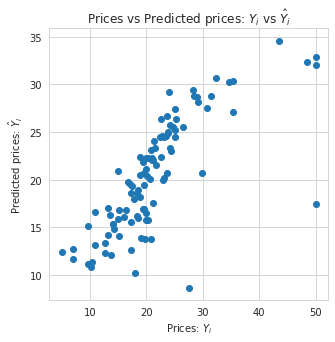


************** error distribution *******************



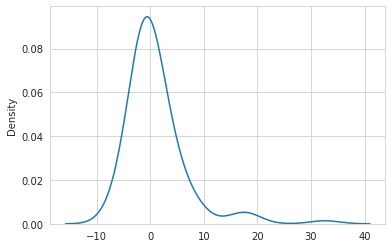


************** y_pred distribution *******************



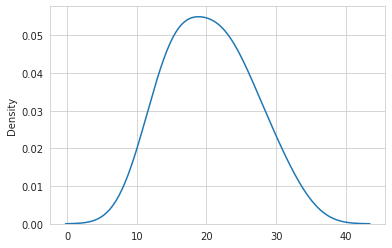

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.595850,0.626142,0.617381,0.732354,0.558566,0.0
adjusted_r2_score,0.536146,0.570913,0.560858,0.692815,0.493354,0.0
median_absolute_error,1.602707,1.845704,1.861732,1.447651,1.893227,0.0
mean_squared_error,29.637835,27.416432,28.058895,19.627524,32.372028,0.0
mean_absolute_percentage_error,0.158276,0.159634,0.154954,0.128652,0.161238,0.0
mean_absolute_error,3.089470,3.061948,3.089256,2.447135,3.323745,0.0


In [23]:
print('*'*50)
print(' '*20 + 'best estimator' + ' '*20)
print('*'*50)
print(svr_gridsearch.best_estimator_)
print('*'*50)
y_pred_svr = svr_gridsearch.predict(X_test)
print('*'*50)
print(' '*20 + 'test metrics' + ' '*20)
print('*'*50)
metrics(y_test,y_pred_svr,model = 'sigmoid_kernel_SVR')
print('*'*50)
print(' '*20 + 'test metrics plot' + ' '*20)
print('*'*50)
plot(y_test,y_pred_svr)
result_dataset

# lets implement nu-svr

In [30]:
parameters = {'nu': np.random.uniform(low=0.0000001, high=1.0, size=5),'C': np.random.uniform(low=0.0, high=3.0, size=5),'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'degree': range(1, 5) }
svr_gridsearch = GridSearchCV(NuSVR(max_iter = 9000),parameters, scoring = 'neg_mean_absolute_percentage_error', cv = 5, return_train_score = True)
svr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=NuSVR(max_iter=9000),
             param_grid={'C': array([0.18490403, 1.39736278, 2.74402931, 2.63046998, 0.61640196]),
                         'degree': range(1, 5),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'nu': array([0.61703232, 0.94376007, 0.08956809, 0.88270125, 0.96893279])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

**************************************************
                    best estimator                    
**************************************************
NuSVR(C=2.8279575888702864, degree=1, max_iter=6000, nu=0.5508700940755898)
**************************************************
**************************************************
                    test metrics                    
**************************************************
r2_score for Nu_SVM :0.7498137202593601
adjusted_r2_score for Nu_SVM :0.7128543834794929
median_absolute_error for Nu_SVM :1.4557380233404142
mean_squared_error for Nu_SVM :18.34710638818799
mean_absolute_percentage_error for Nu_SVM :0.12416715400721512
mean_absolute_error for Nu_SVM :2.3843901357144497
**************************************************
                    test metrics plot                    
**************************************************

************* y_true vs y_pred ********************



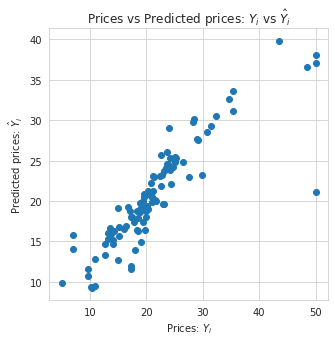


************** error distribution *******************



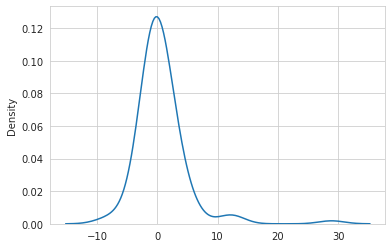


************** y_pred distribution *******************



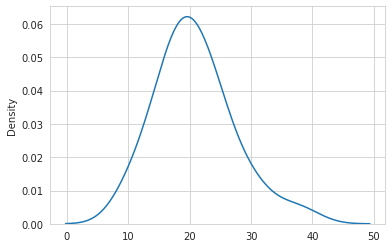

,linear_SVR,linear_kernel_SVR,ploy_kernel_SVR,rbf_kernel_SVR,sigmoid_kernel_SVR,Nu_SVM
r2_score,0.595850,0.626142,0.617381,0.732354,0.558566,0.749814
adjusted_r2_score,0.536146,0.570913,0.560858,0.692815,0.493354,0.712854
median_absolute_error,1.602707,1.845704,1.861732,1.447651,1.893227,1.455738
mean_squared_error,29.637835,27.416432,28.058895,19.627524,32.372028,18.347106
mean_absolute_percentage_error,0.158276,0.159634,0.154954,0.128652,0.161238,0.124167
mean_absolute_error,3.089470,3.061948,3.089256,2.447135,3.323745,2.384390


In [29]:
print('*'*50)
print(' '*20 + 'best estimator' + ' '*20)
print('*'*50)
print(svr_gridsearch.best_estimator_)
print('*'*50)
y_pred_svr = svr_gridsearch.predict(X_test)
print('*'*50)
print(' '*20 + 'test metrics' + ' '*20)
print('*'*50)
metrics(y_test,y_pred_svr,model = 'Nu_SVM')
print('*'*50)
print(' '*20 + 'test metrics plot' + ' '*20)
print('*'*50)
plot(y_test,y_pred_svr)
result_dataset